Group Assignment 2

Course Code: 	RSM 1215	Date: 	11/06/2023
Course Title:	
Student Number: 	1001007233 |
                    999797162 |
                    1009776510 |
                    999905599

Instructor Name:	Regina Seibel		
Assignment Title: 	Group Assignment 2		

________________________________________
  
   Code of Behaviour on Academic Matters.
 

# Part I

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

file_path = 'HW2_data.xlsx'
df = pd.read_excel(file_path)
df.shape

(1000, 15)

In [4]:
df.head()

,churn,CHURN,tenure,monthlycharges,paperlessbilling,PAPERLESSBILLING,dependents,DEPENDENTS,internetservice,FIBER,DSL,phoneservice,PHONESERVICE,sample_training,sample_test
0,Yes,1,9,80.849998,Yes,1,No,0,Fiber optic,1,0,Yes,1,1,0
1,No,0,42,92.150002,Yes,1,Yes,1,Fiber optic,1,0,Yes,1,1,0
2,Yes,1,2,79.849998,Yes,1,No,0,Fiber optic,1,0,Yes,1,1,0
3,Yes,1,3,75.500000,Yes,1,No,0,Fiber optic,1,0,Yes,1,1,0
4,Yes,1,6,84.199997,Yes,1,No,0,Fiber optic,1,0,Yes,1,1,0


part1.a

<Axes: xlabel='monthlycharges', ylabel='tenure'>

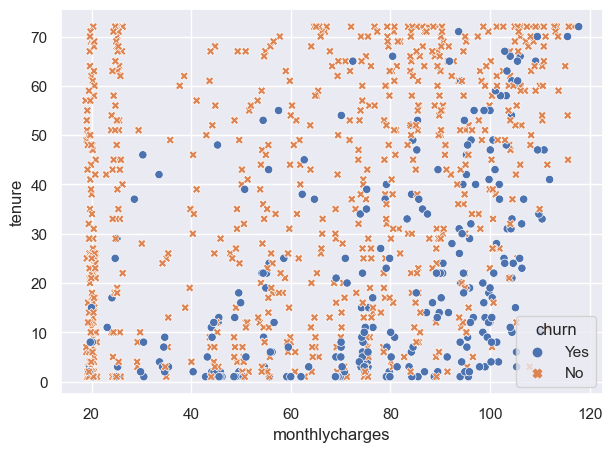

In [5]:
sns.set(rc={'figure.figsize':(7, 5)})
sns.scatterplot(data=df, x='monthlycharges', y='tenure', style='churn', hue='churn')

Part B

In [6]:
df['monthlycharges'].corr(df['CHURN']), df['tenure'].corr(df['CHURN'])

(0.21262480170132542, -0.30178884445088405)

From the plot, there seems to be positve correlation between monthlycharges abd churn and negative correlation between tenure and churn. The correlation stats computed is also consistent with the observation from the plot. 

Part1.C

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression()
model.fit(df[['monthlycharges','tenure']], df['CHURN'])
y_hat = model.predict(df[['monthlycharges','tenure']])

print(classification_report(df['CHURN'], y_hat))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       723
           1       0.64      0.43      0.52       277

    accuracy                           0.78      1000
   macro avg       0.72      0.67      0.68      1000
weighted avg       0.76      0.78      0.76      1000



In [8]:
model.coef_, model.intercept_

(array([[ 0.03318729, -0.04807316]]), array([-1.93053442]))

Part1. D

In [9]:
df['pred'] = np.where(y_hat >= 0.5, 1, 0)
df.head()

,churn,CHURN,tenure,monthlycharges,paperlessbilling,PAPERLESSBILLING,dependents,DEPENDENTS,internetservice,FIBER,DSL,phoneservice,PHONESERVICE,sample_training,sample_test,pred
0,Yes,1,9,80.849998,Yes,1,No,0,Fiber optic,1,0,Yes,1,1,0,1
1,No,0,42,92.150002,Yes,1,Yes,1,Fiber optic,1,0,Yes,1,1,0,0
2,Yes,1,2,79.849998,Yes,1,No,0,Fiber optic,1,0,Yes,1,1,0,1
3,Yes,1,3,75.500000,Yes,1,No,0,Fiber optic,1,0,Yes,1,1,0,1
4,Yes,1,6,84.199997,Yes,1,No,0,Fiber optic,1,0,Yes,1,1,0,1


In [10]:
df['pred_labl'] = np.where((df['CHURN'] == 1) & (df['pred'] == 1), "true positive", '')
df['pred_labl'] = np.where((df['CHURN'] == 0) & (df['pred'] == 0), "true negative", df['pred_labl'])
df['pred_labl'] = np.where((df['CHURN'] == 0) & (df['pred'] == 1), "false positive", df['pred_labl'])
df['pred_labl'] = np.where((df['CHURN'] == 1) & (df['pred'] == 0), "false negative", df['pred_labl'])
df.groupby('pred_labl')['churn'].count()

pred_labl
false negative    158
false positive     66
true negative     657
true positive     119
Name: churn, dtype: int64

<Axes: xlabel='monthlycharges', ylabel='tenure'>

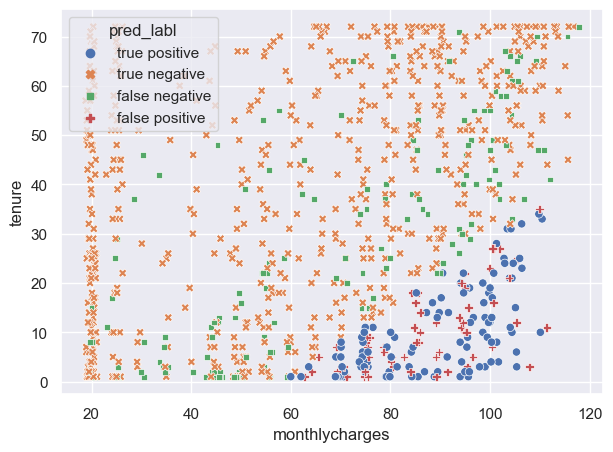

In [11]:
sns.scatterplot(data=df, x='monthlycharges', y='tenure', style='pred_labl', hue='pred_labl')

Part1. E

Given that it is only using two features, the model is doing a fairly good job. However, it does seem like false positive mostly happen in the lower right region and false negative mostly happen in the upper left region, a pattern that may be captured with additional features.

Part1. F

In [12]:
pred_prob = model.predict_proba(df[['monthlycharges','tenure']])[:,1]
df['pred_prob2'] = pred_prob
df['pred2'] = np.where(pred_prob >= 0.7, 1, 0)
df['pred_labl2'] = np.where((df['CHURN'] == 1) & (df['pred2'] == 1), "true positive", '')
df['pred_labl2'] = np.where((df['CHURN'] == 0) & (df['pred2'] == 0), "true negative", df['pred_labl2'])
df['pred_labl2'] = np.where((df['CHURN'] == 0) & (df['pred2'] == 1), "false positive", df['pred_labl2'])
df['pred_labl2'] = np.where((df['CHURN'] == 1) & (df['pred2'] == 0), "false negative", df['pred_labl2'])
print(classification_report(df['CHURN'], df['pred2']))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       723
           1       0.76      0.09      0.16       277

    accuracy                           0.74      1000
   macro avg       0.75      0.54      0.50      1000
weighted avg       0.74      0.74      0.66      1000



In [13]:
df.groupby('pred_labl2')['churn'].count()

pred_labl2
false negative    252
false positive      8
true negative     715
true positive      25
Name: churn, dtype: int64

Part1. G

In [14]:
df.groupby('DEPENDENTS')['CHURN'].mean()

DEPENDENTS
0    0.338483
1    0.125000
Name: CHURN, dtype: float64

Part1. H

Looks like there is correlation between dependents and churn. When dependents is yes, the churn rate is lower.

Part1. I

Text(0.5, 1.0, 'DEPENDENTS == 0')

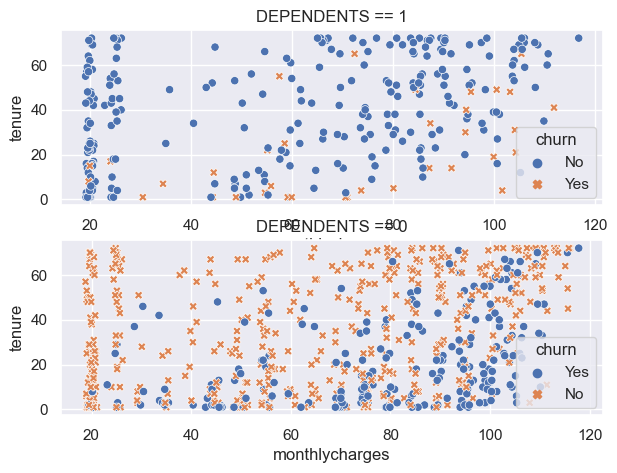

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1)
sns.scatterplot(data=df.query("DEPENDENTS == 1"), x='monthlycharges', y='tenure', style='churn', hue='churn', ax=axes[0])
axes[0].set_title('DEPENDENTS == 1')

sns.scatterplot(data=df.query("DEPENDENTS == 0"), x='monthlycharges', y='tenure', style='churn', hue='churn', ax=axes[1])
axes[1].set_title('DEPENDENTS == 0')

Part1. J

In [16]:
df.groupby('DEPENDENTS')[['CHURN', 'monthlycharges']].corr()


CHURN  monthlycharges
DEPENDENTS                                         
0          CHURN           1.000000        0.223897
           monthlycharges  0.223897        1.000000
1          CHURN           1.000000        0.112887
           monthlycharges  0.112887        1.000000

In [17]:
df.groupby('DEPENDENTS')[['CHURN', 'tenure']].corr()

CHURN    tenure
DEPENDENTS                           
0          CHURN   1.000000 -0.281518
           tenure -0.281518  1.000000
1          CHURN   1.000000 -0.274477
           tenure -0.274477  1.000000

Looks like when dependents == 0, monthlycharges is more correlated with churn. However, the correlation between tenure and churn does not seem to be affected by dependents. 

Part1. K

In [18]:
model = LogisticRegression()
model.fit(df[['monthlycharges','tenure', 'DEPENDENTS']], df['CHURN'])
y_hat = model.predict(df[['monthlycharges','tenure', 'DEPENDENTS']])
print(classification_report(df['CHURN'], y_hat))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       723
           1       0.62      0.43      0.51       277

    accuracy                           0.77      1000
   macro avg       0.71      0.66      0.68      1000
weighted avg       0.75      0.77      0.75      1000



In [19]:
model.intercept_, model.coef_

(array([-1.69641001]), array([[ 0.03167107, -0.04556931, -0.86374769]]))

Part1. I

In [20]:
idx = df.eval("DEPENDENTS == 1")
print(classification_report(df.loc[idx, 'CHURN'], y_hat[idx]))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       252
           1       0.50      0.03      0.05        36

    accuracy                           0.88       288
   macro avg       0.69      0.51      0.49       288
weighted avg       0.83      0.88      0.82       288



In [21]:
idx = df.eval("DEPENDENTS == 0")
print(classification_report(df.loc[idx, 'CHURN'], y_hat[idx]))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       471
           1       0.62      0.49      0.55       241

    accuracy                           0.73       712
   macro avg       0.69      0.67      0.68       712
weighted avg       0.72      0.73      0.72       712



When dependents is 1, accuracy is higher and F1 score is lower because very few examples are classified as churn. When Dependents is 0, accuracy is lower but F1 score is higher.

Part1. m

In [22]:
pred_data = [
    [5, 25, 1],
    [5, 75, 1],
    [50, 25, 1],
    [50, 75, 1],
    [5, 25, 0],
    [5, 75, 0],
    [50, 25, 0],
    [50, 75, 0]
]

In [23]:
model = LogisticRegression()
model.fit(df[['monthlycharges','tenure', 'DEPENDENTS']], df['CHURN'])
y_prob = model.predict_proba(pred_data)[:, 1]
y_prob

/Users/yuzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.02816694, 0.0029603 , 0.10756707, 0.01219689, 0.06432695,
       0.00699352, 0.22233872, 0.02845525])

# Part 2

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np

file_path = 'HW2_data.xlsx'
df = pd.read_excel(file_path)
df.shape

(1000, 15)

### Part2.a.

In [25]:
#Split the training and test dataset

dftraining = df.loc[(df.sample_training==1),['CHURN','FIBER','DSL','tenure','monthlycharges']]
dftest = df.loc[(df.sample_test==1),['CHURN','FIBER','DSL','tenure','monthlycharges']]


In [26]:
#Experiment 1

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model1 = LogisticRegression()
model1.fit(dftraining[['FIBER','DSL']], dftraining['CHURN'])
y_hat1 = model1.predict(dftraining[['FIBER','DSL']])

print(classification_report(dftraining['CHURN'], y_hat1))

model1.intercept_, model1.coef_

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       512
           1       0.00      0.00      0.00       188

    accuracy                           0.73       700
   macro avg       0.37      0.50      0.42       700
weighted avg       0.53      0.73      0.62       700



/Users/yuzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([-2.58976346]), array([[2.25325005, 1.16968381]]))

In [27]:
y_hatTest1 = model1.predict(dftest[['FIBER','DSL']])

print(classification_report(dftest['CHURN'], y_hatTest1))


              precision    recall  f1-score   support

           0       0.70      1.00      0.83       211
           1       0.00      0.00      0.00        89

    accuracy                           0.70       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.49      0.70      0.58       300



/Users/yuzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
#Experiment 2

model2 = LogisticRegression()
model2.fit(dftraining[['tenure']], dftraining['CHURN'])
y_hat2 = model2.predict(dftraining[['tenure']])

print(classification_report(dftraining['CHURN'], y_hat2))
model2.intercept_, model2.coef_

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       512
           1       0.00      0.00      0.00       188

    accuracy                           0.73       700
   macro avg       0.37      0.50      0.42       700
weighted avg       0.53      0.73      0.62       700



/Users/yuzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([-0.02430472]), array([[-0.03562946]]))

In [29]:
y_hatTest2 = model2.predict(dftest[['tenure']])

print(classification_report(dftest['CHURN'], y_hatTest2))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83       211
           1       0.00      0.00      0.00        89

    accuracy                           0.70       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.49      0.70      0.58       300



/Users/yuzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# Experiment 3

model3 = LogisticRegression()
model3.fit(dftraining[['FIBER','DSL','tenure']], dftraining['CHURN'])
y_hat3 = model3.predict(dftraining[['FIBER','DSL','tenure']])

print(classification_report(dftraining['CHURN'], y_hat3))
model3.intercept_, model3.coef_

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       512
           1       0.62      0.42      0.50       188

    accuracy                           0.78       700
   macro avg       0.72      0.66      0.68       700
weighted avg       0.76      0.78      0.76       700



(array([-1.59113603]), array([[ 2.55401982,  1.17566126, -0.04200055]]))

In [31]:
y_hatTest3 = model3.predict(dftest[['FIBER','DSL','tenure']])

print(classification_report(dftest['CHURN'], y_hatTest3))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       211
           1       0.60      0.35      0.44        89

    accuracy                           0.74       300
   macro avg       0.68      0.62      0.63       300
weighted avg       0.72      0.74      0.71       300



### Part2. b

### Compare to Experiment #1 and Experiment #2, the Experiment #3 shows higher f1-score, precision, recall for both training and test datasets


### Part2. C 
The 3 models are underfit because in the test datasets, the accuracy, precsion, and F1-score are lower

### Part2.d

In [32]:
# Create new features
TenurexFIBER =  df.tenure * df.FIBER
TenurexDSL =  df.tenure * df.DSL

# Add 'TenurexFIBER''TenurexDSL' as the column name
df['TenurexFIBER'] = TenurexFIBER
df['TenurexDSL'] = TenurexDSL


# Set up new training and test dataset
newdftraining = df.loc[(df.sample_training==1),['CHURN','FIBER','DSL','tenure','TenurexFIBER','TenurexDSL','monthlycharges']]
newdftest = df.loc[(df.sample_test==1),['CHURN','FIBER','DSL','tenure','TenurexFIBER','TenurexDSL','monthlycharges']]


In [33]:
# Experiment 4: FIBER, DSL, Tenure and TenurexFIBER

model4 = LogisticRegression()
model4.fit(newdftraining[['FIBER','DSL','tenure','TenurexFIBER']], newdftraining['CHURN'])
y_hat4 = model4.predict(newdftraining[['FIBER','DSL','tenure','TenurexFIBER']])

print(classification_report(newdftraining['CHURN'], y_hat4))
model4.intercept_, model4.coef_


y_hatTest4 = model4.predict(newdftest[['FIBER','DSL','tenure','TenurexFIBER']])

print(classification_report(newdftest['CHURN'], y_hatTest4))

# Experiment 5: FIBER, DSL, Tenure and TenurexDSL
model5 = LogisticRegression()
model5.fit(newdftraining[['FIBER','DSL','tenure','TenurexDSL']], newdftraining['CHURN'])
y_hat5 = model5.predict(newdftraining[['FIBER','DSL','tenure','TenurexFIBER']])

print(classification_report(newdftraining['CHURN'], y_hat5))
model5.intercept_, model5.coef_


y_hatTest5 = model5.predict(newdftest[['FIBER','DSL','tenure','TenurexDSL']])

print(classification_report(newdftest['CHURN'], y_hatTest5))

# Experiment 6: FIBER, DSL, Tenure, TenurexFIBER, and TenurexDSL
model6 = LogisticRegression()
model6.fit(newdftraining[['FIBER','DSL','tenure','TenurexFIBER','TenurexDSL']], newdftraining['CHURN'])
y_hat6 = model6.predict(newdftraining[['FIBER','DSL','tenure','TenurexFIBER','TenurexDSL']])

print(classification_report(newdftraining['CHURN'], y_hat6))
model6.intercept_, model6.coef_


y_hatTest6 = model6.predict(newdftest[['FIBER','DSL','tenure','TenurexFIBER','TenurexDSL']])

print(classification_report(newdftest['CHURN'], y_hatTest6))


              precision    recall  f1-score   support

           0       0.80      0.91      0.85       512
           1       0.61      0.40      0.48       188

    accuracy                           0.77       700
   macro avg       0.71      0.65      0.67       700
weighted avg       0.75      0.77      0.75       700



/Users/yuzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- TenurexFIBER
Feature names seen at fit time, yet now missing:
- TenurexDSL

  warnings.warn(message, FutureWarning)


              precision    recall  f1-score   support

           0       0.76      0.91      0.83       211
           1       0.60      0.33      0.42        89

    accuracy                           0.74       300
   macro avg       0.68      0.62      0.63       300
weighted avg       0.72      0.74      0.71       300

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       512
           1       0.61      0.33      0.43       188

    accuracy                           0.76       700
   macro avg       0.70      0.63      0.64       700
weighted avg       0.74      0.76      0.74       700

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       211
           1       0.60      0.35      0.44        89

    accuracy                           0.74       300
   macro avg       0.68      0.62      0.63       300
weighted avg       0.72      0.74      0.71       300

              preci

### Part2.e.
Experiment 6, with both tenure times FIBER, and tenure times DSL as two new features, because that model will produce the highest f1-score and accuracy in both training and test datasets.

### Part2.f.

In [34]:
# Create new features
TenurexCharges =  df.tenure * df.monthlycharges

# Add 'TenurexCharges' as the column name
df['TenurexCharges'] = TenurexCharges

# Set up new 2 training and test dataset
new2dftraining = df.loc[(df.sample_training==1),['CHURN','FIBER','DSL','tenure','TenurexFIBER','TenurexDSL','monthlycharges','TenurexCharges']]
new2dftest = df.loc[(df.sample_test==1),['CHURN','FIBER','DSL','tenure','TenurexFIBER','TenurexDSL','monthlycharges','TenurexCharges']]


In [35]:
# Experiment 3+Tenure*Charges

model3plus = LogisticRegression()
model3plus.fit(new2dftraining[['FIBER','DSL','tenure','TenurexCharges']], new2dftraining['CHURN'])
y_hat3plus = model3plus.predict(new2dftraining[['FIBER','DSL','tenure','TenurexCharges']])

print(classification_report(new2dftraining['CHURN'], y_hat3plus))
model3plus.intercept_, model3plus.coef_

y_hatTest3plus = model3plus.predict(new2dftest[['FIBER','DSL','tenure','TenurexCharges']])

print(classification_report(new2dftest['CHURN'], y_hatTest3plus))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       512
           1       0.62      0.41      0.50       188

    accuracy                           0.77       700
   macro avg       0.71      0.66      0.68       700
weighted avg       0.76      0.77      0.76       700

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       211
           1       0.62      0.34      0.44        89

    accuracy                           0.74       300
   macro avg       0.70      0.63      0.64       300
weighted avg       0.72      0.74      0.72       300



### Part2.f.

The change of f1-score and accuracy are insignificant with the additional feature, and therefore it didn't improve the model.

### Part2.e. 
The churn of increasing tenure is not obvious.